In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.shape

(400, 5)

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**we are going to work on age estimatedsalary and pruchased column**

In [6]:
x = df.iloc[:,2:4].values
y = df.iloc[:,-1].values

In [7]:
print(x.shape)
print(y.shape)

(400, 2)
(400,)


In [49]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [50]:
x_train

array([[    32, 117000],
       [    45,  22000],
       [    29,  80000],
       [    35,  23000],
       [    59,  29000],
       [    38,  55000],
       [    53, 143000],
       [    42,  64000],
       [    40,  57000],
       [    29,  47000],
       [    42,  54000],
       [    40,  47000],
       [    42,  65000],
       [    41,  60000],
       [    45, 131000],
       [    51, 146000],
       [    35,  50000],
       [    54,  26000],
       [    60, 108000],
       [    39,  77000],
       [    52,  21000],
       [    30,  62000],
       [    31,  68000],
       [    40,  75000],
       [    48, 141000],
       [    55,  39000],
       [    53,  72000],
       [    57, 122000],
       [    29,  28000],
       [    47,  47000],
       [    37,  55000],
       [    35,  57000],
       [    31,  74000],
       [    40,  61000],
       [    20,  74000],
       [    45,  45000],
       [    31,  34000],
       [    21,  72000],
       [    45,  26000],
       [    22,  81000],


In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


In [52]:
# scalaing values
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [53]:
x_train

array([[-0.52567793,  1.39737514],
       [ 0.70633344, -1.38365296],
       [-0.80998824,  0.31423788],
       [-0.24136761, -1.35437898],
       [ 2.03311492, -1.1787351 ],
       [ 0.0429427 , -0.41761162],
       [ 1.46449428,  2.15849862],
       [ 0.42202313, -0.1541458 ],
       [ 0.23248291, -0.35906366],
       [-0.80998824, -0.65180346],
       [ 0.42202313, -0.4468856 ],
       [ 0.23248291, -0.65180346],
       [ 0.42202313, -0.12487182],
       [ 0.32725302, -0.27124172],
       [ 0.70633344,  1.80721086],
       [ 1.27495407,  2.24632056],
       [-0.24136761, -0.56398152],
       [ 1.55926439, -1.26655704],
       [ 2.12788502,  1.13390932],
       [ 0.13771281,  0.22641594],
       [ 1.36972418, -1.41292694],
       [-0.71521814, -0.21269376],
       [-0.62044803, -0.03704988],
       [ 0.23248291,  0.16786798],
       [ 0.99064376,  2.09995066],
       [ 1.65403449, -0.8859953 ],
       [ 1.46449428,  0.08004604],
       [ 1.8435747 ,  1.54374504],
       [-0.80998824,

<p color = 'green'> solving problem(find k value)  with 1st method (sqrt) </p>

In [54]:
def find_k(row):
  temp = int(np.sqrt(row))

  if temp % 2 == 1 :
    return temp
  else :
    return temp - 1

In [55]:
find_k(440)

19

In [56]:
k = find_k(x_train.shape[0])
k

17

In [57]:
# model
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier(n_neighbors = k)

In [59]:
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=17)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y_test , knn.predict(x_test)) * 100

91.25

In [62]:
from sklearn.metrics import confusion_matrix

In [65]:
confusion_matrix(y_test , knn.predict(x_test))

array([[47,  5],
       [ 2, 26]])

major diagonal me right predictions and non diagonal me wrong pridiction h

<p color = 'green'> solving problem(find k value)  with 2<sup>nd</sup> method (sqrt) </p>

In [91]:
lower = 1
upper = 100

In [92]:
accuracy = []

for i in range (lower , upper) :
  knn1 = KNeighborsClassifier(n_neighbors = i)
  knn1.fit(x_train , y_train)
  accuracy.append( accuracy_score(y_test , knn1.predict(x_test)))

In [93]:
accuracy

[0.8375,
 0.8,
 0.95,
 0.9375,
 0.925,
 0.9375,
 0.925,
 0.9,
 0.9,
 0.9125,
 0.9,
 0.925,
 0.9125,
 0.9,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.925,
 0.925,
 0.9125,
 0.9125,
 0.9125,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.925,
 0.9375,
 0.9375,
 0.925,
 0.9375,
 0.925,
 0.9375,
 0.9375,
 0.9375,
 0.925,
 0.925,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9125,
 0.925,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.9,
 0.9,
 0.8875,
 0.9,
 0.8875,
 0.9,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.9,
 0.8875,
 0.8875,
 0.875,
 0.875,
 0.875]

In [94]:
accuracy.index(max(accuracy))

2

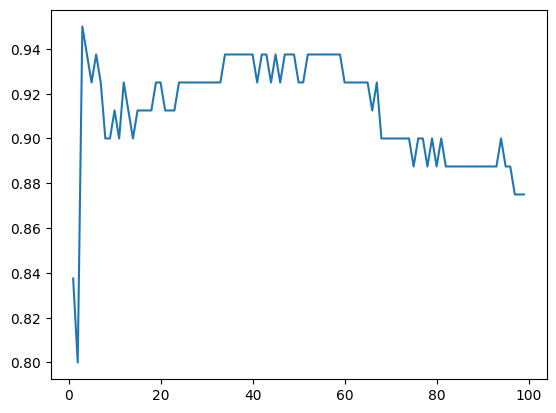

In [95]:
# finding max accuracy
plt.plot(range(lower, upper) , accuracy )

k = 3

In [85]:
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(x_train , y_train)
accuracy_score(y_test , knn1.predict(x_test))

0.95

In [104]:
def predict_from_user():
  age = int(input('Enter Age : '))
  salary = int(input('Eneter Salary : '))

  x_test_1 =  np.array([[age] ,[salary]]).reshape(1,2)
  x_test_1 = scaler.transform(x_test_1)

  if knn1.predict(x_test_1)[0] == 0:
    print('Will NOT purchase')
  else :
    print('Will purchase')

In [114]:
predict_from_user()

Enter Age : 53
Eneter Salary : 72000
Will purchase


In [112]:
df.sample(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
149,15767871,Male,20,74000,0
346,15646936,Male,53,72000,1
